## Abalone

Predicting the age of abalone from physical measurements. The age ofabalone is determined by cutting the shell through the cone, staining it,and counting the number of rings through a microscope – a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the Original data set missing values are removed.Various plots are plotted for the analysing the dataset and a calculation is finally made to predict the age of abalone

### Retreiving Data

In [91]:
import pandas as pd
df = pd.read_csv('Abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [92]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### EDA

In [82]:
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [94]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [88]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [87]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])

KeyError: 'Sex'

As the data do not show feature 'Sex' because it is of the type Object

### Correlation

In [95]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


### Plotting the Heatmap

Even the Correlation also do not show feature 'Sex' hence the data is not included while plotting the Heatmap

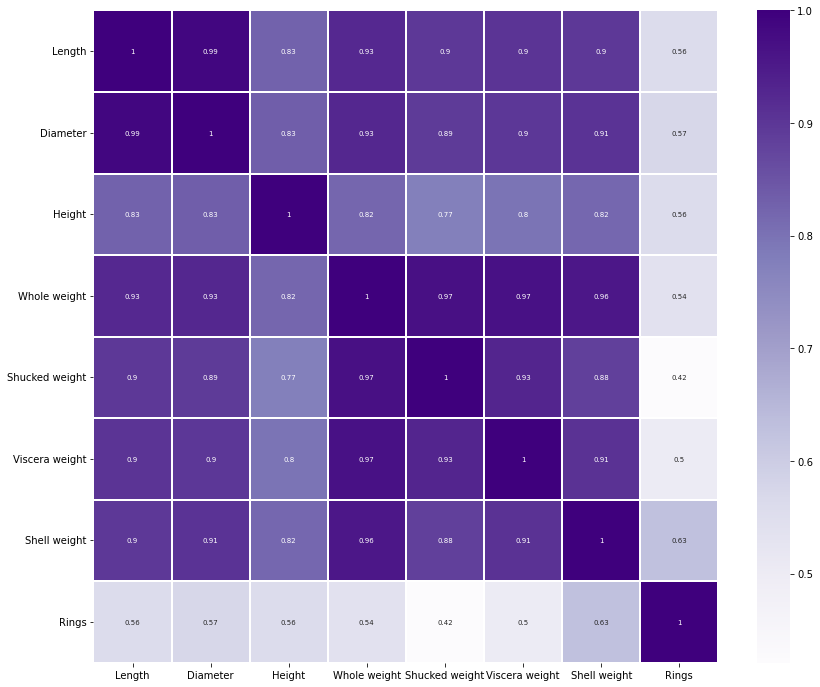

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
plt.show()

In [21]:
df = df.drop(['Sex'],axis=1)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [22]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


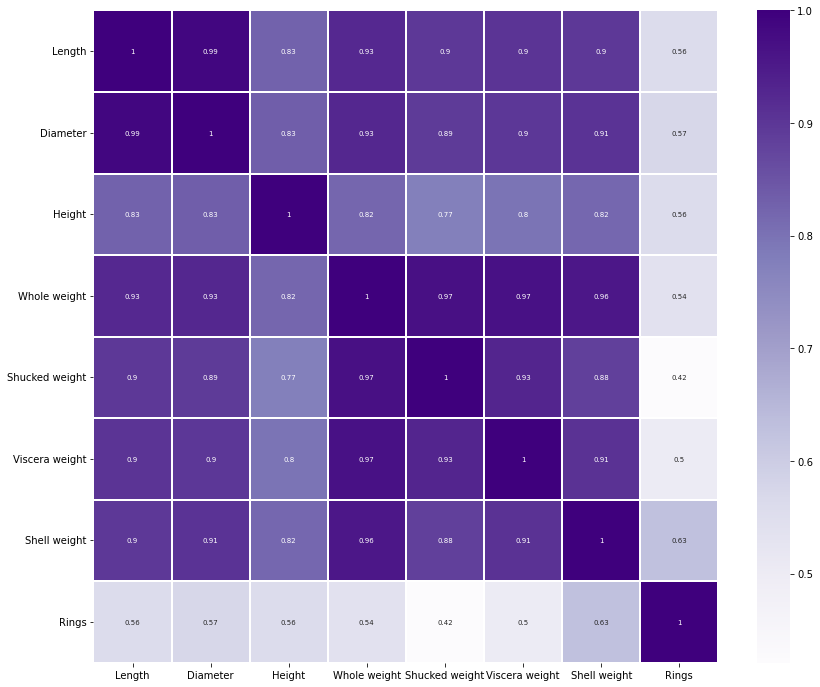

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
plt.show()

### Correlation

### Labeling the Data

The dataset has Target ['Ring'] which is a continous data

In [24]:
print(set(df['Rings']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29}


### Splitting the Dataset into Training and Test

In [26]:
x = df.drop(['Rings'],axis=1)
y = df['Rings']

### Training the Dataset 

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

### Fitting the Models

1. K-nearest Neighbours(KNN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
# Initializing classifier and giving hyperparameter k=3
knn = KNeighborsClassifier(n_neighbors=3)
# training classifier
knn.fit(x_train, y_train)
# Evaluate the classifier
print(knn.score(x_test, y_test))
# Try changing hyperparameter
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.20813397129186603
0.22248803827751196


2. Logisitic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
# Initializing classifier with one-v-rest approach. random_state is # to ensure same results in every execution.
logr = LogisticRegression(multi_class = 'ovr', random_state=3)
# training classifier
logr.fit(x_train, y_train)
# Evaluate the classifier
print(logr.score(x_test, y_test))

0.23803827751196172


In [79]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [85]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])

KeyError: 'Sex'

In [86]:
df['Sex'].value_counts()

KeyError: 'Sex'

As the Models are not showing better results so Using the Decision Tree

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model = DecisionTreeRegressor()
# fit the estimator to the data
model.fit(x_train, y_train)
# apply the model to the test and training data
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

In [42]:
def scatter_y(y_true, y_predicted):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(y_true, y_predicted, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (y_true - y_predicted).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

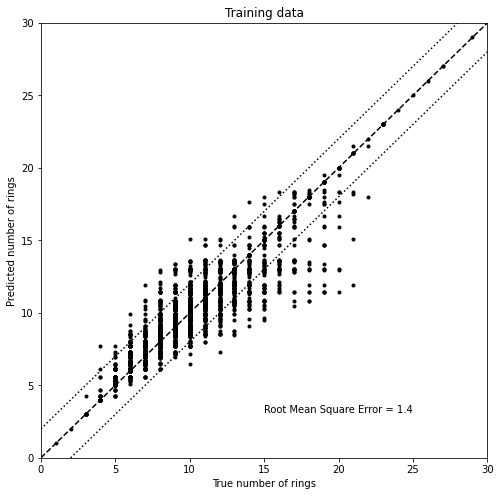

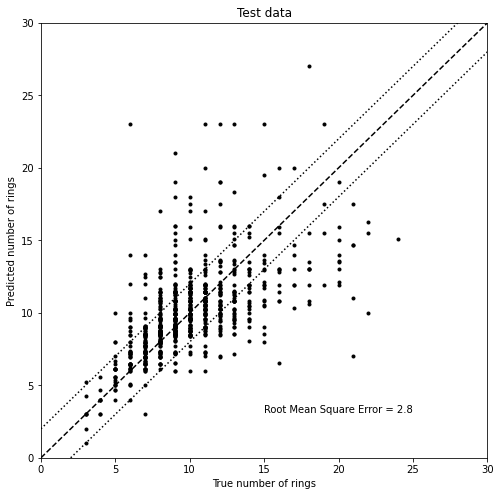

In [52]:
scatter_y(y_train, y_train_predict)
plt.title("Training data")
scatter_y(y_test, y_test_predict)
plt.title("Test data");

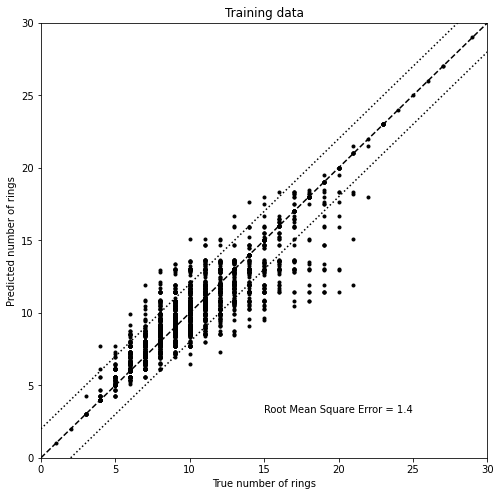

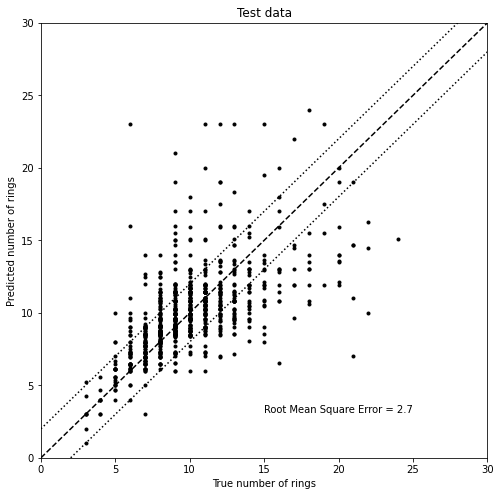

In [54]:
model = DecisionTreeRegressor(max_depth=10)
# fit the estimator to the data
model.fit(x_train, y_train)
# apply the model to the test and training data
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)
scatter_y(y_train, y_train_predict)
plt.title("Training data")
rms_decision_tree = scatter_y(y_test, y_test_predict)
plt.title("Test data");

### Also Fitting Random Forest Regressor

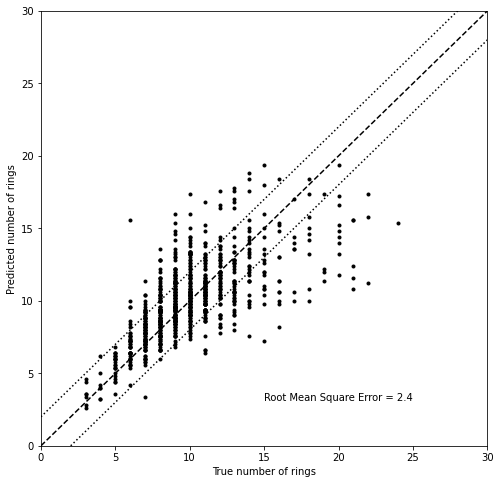

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=5)
model.fit(x_train, y_train)
y_test_predict = model.predict(x_test)
rms_random_forest = scatter_y(y_test, y_test_predict)

### Result

In [55]:
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_decision_tree, rms_random_forest))

Root Mean Square error decreases from 2.7 to 2.4.


In [56]:
model = RandomForestRegressor(n_estimators=100)

In [58]:
n_features=x.shape[1]

### Maximum Feature and Mininum Depth

In [68]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
grid = RandomizedSearchCV(model, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(x, y)
print(grid.best_params_)

{'max_features': 5, 'max_depth': 9}


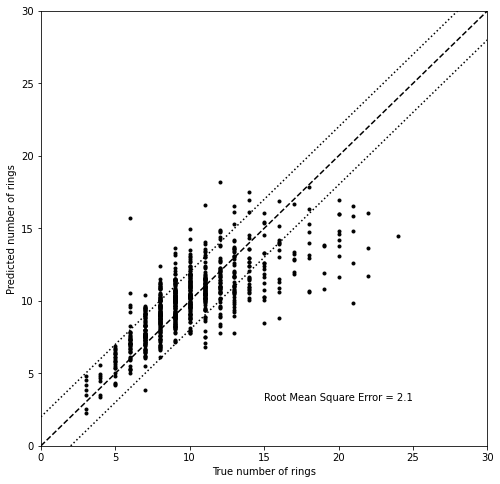

In [71]:
model = RandomForestRegressor(max_features=grid.best_params_["max_features"],
                              max_depth=grid.best_params_["max_depth"])
model.fit(x_train,y_train)
y_test_predict = model.predict(x_test)
rms_optimized_random_forest = scatter_y(y_test, y_test_predict)

In [72]:
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_random_forest, rms_optimized_random_forest))

Root Mean Square error decreases from 2.4 to 2.1.


### Conclusion

In [74]:
a = np.array(y_test)
predicted=np.array(model.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted})
df_com

,Original,Predicted
0,10,9.700316
1,8,10.810196
2,8,8.805772
3,8,6.725046
4,8,11.249094
...,...,...
831,9,8.171654
832,8,6.783726
833,20,13.777450
834,13,10.068984


In [98]:
import pickle
filename = 'Abalone.pkl'
pickle.dump(model,open(filename,'wb'))